In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf

# WE ARE USING SAME BTC-USD data from Q2

#Fetching data from Yfinance
df=yf.download("BTC-USD",start="2022-01-01",end="2025-01-01")

if isinstance(df.columns,pd.MultiIndex):
  df.columns = [col[0] for col in df.columns]

#Initialinzing matplotlib
plt.figure(figsize=(12,8))


/tmp/ipython-input-1041067.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download("BTC-USD",start="2022-01-01",end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [29]:
# CHOSEN METRICS
# body = |Close − Open|

# lower_shadow = min(Open, Close) − Low

# upper_shadow = High − max(Open, Close)

# Hammer condition :

# lower_shadow >= 2 * body

# upper_shadow <= 0.3 * body

# body > 0

In [30]:
df['body'] = abs(df['Close'] - df['Open'])
df['lower_shadow'] = np.minimum(df['Open'], df['Close']) - df['Low']
df['upper_shadow'] = df['High'] - np.maximum(df['Open'], df['Close'])
df['is_hammer'] = (
    (df['lower_shadow'] >= 2 * df['body']) &
    (df['upper_shadow'] <= 0.3 * df['body']) &
    (df['body'] > 0)
)
hammer_count = df['is_hammer'].sum()


Number of Hammer candles: 21


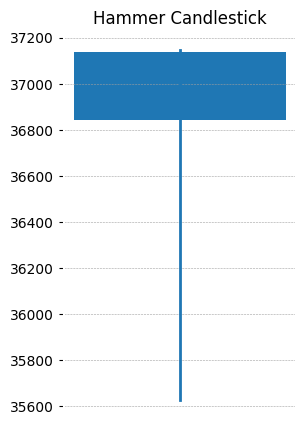

In [31]:
hammer_idx = df[df['is_hammer']].index[0]
row = df.loc[hammer_idx]


plt.figure(figsize=(3,5))

plt.plot([0, 0], [row['Low'], row['High']])

plt.bar(
    0,
    row['Close'] - row['Open'],
    bottom=row['Open'],
    width=0.4
)
print("Number of Hammer candles:", hammer_count)
plt.title("Hammer Candlestick")
plt.xticks([])
plt.show()
